In [1]:
#棄却サンプリング
#確率分布の外観を知るためのもの→ランダムに座標を発生させて、確率分布を満たさないものを棄却していって残ったものから、元の確率分布を近似したものを得る

In [3]:
import numpy as np#scipyは数理全般、statsはその中の統計学部分
from scipy import stats
from scipy import optimize as opt
from scipy.stats import beta,uniform
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use("ggplot")
np.random.seed(123)

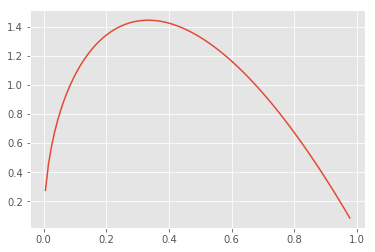

In [5]:
a,b=1.5,2.0
x=np.linspace(beta.ppf(0.001,a,b),beta.ppf(0.999,a,b),100)#np.linespace:等差数列　ppf:cdfの逆関数：累積ｑ％になる点を返す
plt.plot(x,beta.pdf(x,a,b))

In [6]:
f=beta(a=a,b=b).pdf
res=opt.fmin(lambda x:-f(x),0.3)
y_max=f(res)

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


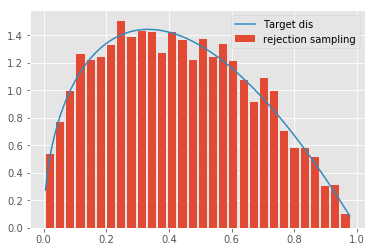

In [7]:
NMCS=5000
x_mcs=uniform.rvs(size=NMCS)
r=uniform.rvs(size=NMCS)*y_max
accept=x_mcs[r<=f(x_mcs)]
plt.hist(accept,normed=True,bins=30,rwidth=0.8,label="rejection sampling")
x=np.linspace(beta.ppf(0.001,a,b),beta.ppf(0.999,a,b),100)
plt.plot(x,beta.pdf(x,a,b),label="Target dis")
plt.legend()